# Preambule

In [1]:
library(stringr)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Functions

## Multiplot

In [4]:
# Multiple plot function from : http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Gases

In [2]:
ggc_long <- read.table('../Gas-others_wt.txt', sep = '\t')

In [4]:
xticks <- seq(0, 7*24, 24)

In [578]:
cma.p <- ggplot(data = ggc_long %>% subset(!str_detect(Sample, pattern = 'null') 
                                         & !(gas == 'H2' & microbe == 'M. smithii')
                                         & !(gas == 'CH4' & microbe == 'C. massiliensis')
                                         & Sample %in% c('MH2', 'Cma', 'CmaM'))
                       , aes(x = Time, y = Concentration, group = id, fill = gas)) + 
            
            stat_summary(aes(linetype = pressure), fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(shape = condition), fun.y = "mean", size = 2, geom = "point", color = 'black') +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            
            
            ylim(c(0,10)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,7*24)) +
            
            scale_shape_manual(name = 'Conditions', values = c(22, 21)
                              , labels = c(expression('H'[2]*' - atm'), expression('N'[2]*' - atm'))) +
            scale_fill_manual(name = 'Gas', values = c("#56B4E9", "#D55E00")
                             , guide=guide_legend(override.aes=list(shape=21))
                             , labels = c(expression('CH'[4])
                                          , expression('H'[2]) ) ) + 
            scale_linetype_manual(values = c("dashed", "dotted", "twodash"), guide = FALSE) +

            facet_grid(. ~microbe) +

            theme_light() + ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'right'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 #, legend.key.size = unit(0.8, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 
            

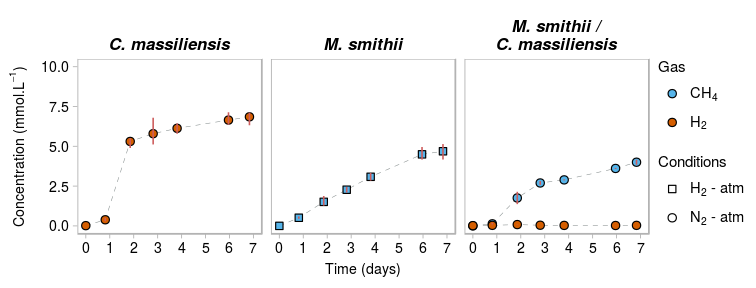

In [579]:
options(repr.plot.width=6.3, repr.plot.height=2.4)
cma.p

In [581]:
cti.p <- ggplot(data = ggc_long %>% subset(!str_detect(Sample, pattern = 'null') 
                                         & !(gas == 'H2' & microbe == 'M. smithii') 
                                         & !(gas == 'CH4' & microbe == 'C. timonensis')
                                         & Sample %in% c('Ct', 'CtM'))
                       , aes(x = Time, y = Concentration, group = id, fill = gas)) + 
            
            stat_summary(aes(linetype = pressure), fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(shape = condition), fun.y = "mean", size = 2, geom = "point", color = 'black') +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            
            
            ylim(c(0,5)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,7*24)) +
            
            scale_shape_manual(name = 'Conditions', values = c(21)
                              , labels = c(expression('H'[2]*' - atm'), expression('N'[2]*' - atm'))) +
            scale_fill_manual(name = 'Gas', values = c("#56B4E9", "#D55E00")
                             , guide=guide_legend(override.aes=list(shape=21))
                             , labels = c(expression('CH'[4])
                                          , expression('H'[2]) ) ) + 
            scale_linetype_manual(values = c("dashed", "dotted", "twodash"), guide = FALSE) +

            facet_grid(. ~microbe) +

            theme_light() + ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'none'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 #, legend.key.size = unit(0.8, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 
            

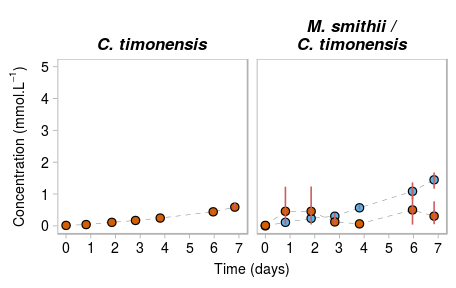

In [582]:
options(repr.plot.width=3.8, repr.plot.height=2.4)
cti.p

# HPLC

In [11]:
data <- read.table('../data/Gas-others_wt.txt', header = TRUE)

In [12]:
data %>% head

Sample,Name,Concentration,Time,Conc_corrected,microbe,headspace,pressure,condition,id,pair,moco
nullN2,Acetate,6.5,0.0,0.0,None,N2,atm,N2-atm,nullN2Acetate,NA,mono
nullN2,Acetate,6.6,44.5,0.0,None,N2,atm,N2-atm,nullN2Acetate,NA,mono
C,Acetate,12.0,44.5,5.4,C. minuta,N2,atm,N2-atm,CAcetate,NA,mono
C,Acetate,12.4,44.5,5.8,C. minuta,N2,atm,N2-atm,CAcetate,NA,mono
C,Acetate,11.6,44.5,5.0,C. minuta,N2,atm,N2-atm,CAcetate,NA,mono
CtM,Acetate,6.8,44.5,0.2,M. smithii / C. timonensis,N2,atm,N2-atm,CtMAcetate,C. timonensis,co


## Plots

In [13]:
data %>% subset((str_detect(Sample, pattern = 'ma') | str_detect(Sample, pattern = 't'))
                 & Time > 6*24 
               ) %>% group_by(Name, Sample, Time) %>% summarize(avg = mean(Conc_corrected), std = sd(Conc_corrected))

Name,Sample,Time,avg,std
Acetate,Cma,164,7.8333333,0.49328829
Acetate,CmaM,164,9.7500000,0.77781746
Acetate,Ct,164,5.0500000,0.21213203
Acetate,CtM,164,4.3333333,1.20968315
Butyrate,Cma,164,0.9333333,0.05773503
Butyrate,CmaM,164,0.2000000,0.14142136
Butyrate,Ct,164,1.1000000,0.00000000
Butyrate,CtM,164,0.1333333,0.15275252


In [15]:
ace.p <- ggplot(data = data %>% subset(!is.na(pair) & Name == 'Acetate')
                       , aes(x = Time, y = Conc_corrected, group = id, fill = moco)) + 
            
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape = 21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            ylim(c(0,15)) +
            scale_x_continuous(breaks=seq(0, 11*24, 24), labels = seq(0, 11, 1), limits = c(0, NA)) +
            
            scale_shape_manual(name = '', guide = FALSE) +
            scale_fill_manual(name = '', values = c('azure2', 'deepskyblue4')
                             , labels = c('Co-culture', 'Mono-culture') )+ 
            facet_grid(. ~pair) +

            theme_light() + ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'none'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = -0.1, l = 0))
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 

In [16]:
but.p <- ggplot(data = data %>% subset(!is.na(pair) & Name == 'Butyrate')
                       , aes(x = Time, y = Conc_corrected, group = id, fill = moco)) + 
            
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape = 21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_x_continuous(breaks=seq(0, 11*24, 24), labels = seq(0, 11, 1), limits = c(0, NA)) +
            scale_y_continuous(breaks=c(0, 0.5, 1.0, 1.5, 2.0, 2.5), labels = c(0, '', 1.0, '', 2.0, ''), limits = c(0, 2.5)) +
            
            scale_shape_manual(name = '', guide = FALSE) +
            scale_fill_manual(name = '', values = c('azure2', 'deepskyblue4')
                             , labels = c('Co-culture', 'Mono-culture') )+ 
            facet_grid(. ~pair) +

            theme_light() + ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'none'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 

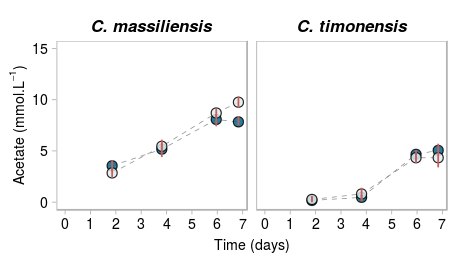

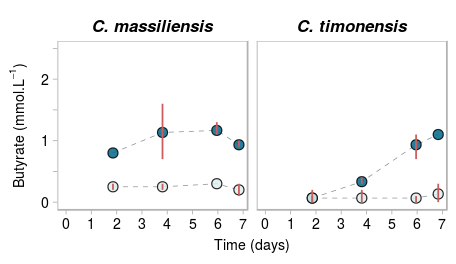

In [17]:
options(repr.plot.width=3.8, repr.plot.height=2.2)
ace.p
but.p

# Statistics

## SCFA

In [106]:
scfa_stat <- read.table('../data/SCFA_wt.txt', stringsAsFactors = F) %>% 
        subset(str_detect(SampleBatch, pattern = 'Catm') & Time > 6*24 & Name != 'Sum') %>% unique %>% 
        select(Name, Sample, Time, Concentration, microbe)

In [107]:
tmp <- data %>% subset((str_detect(Sample, pattern = 'Ct')| str_detect(Sample, pattern = 'Cma')) & Time == 164.0) %>%
          select(-Concentration) %>% rename(Concentration = Conc_corrected) %>%
        select(Name, Sample, Time, Concentration, microbe)%>% unique

In [108]:
scfa_stat <- scfa_stat %>% union(tmp)

In [118]:
scfa_stat %>% subset(str_detect(microbe, pattern = 'ti') & Name == 'Acetate')

,Name,Sample,Time,Concentration,microbe
12,Acetate,Ct,164,5.2,C. timonensis
13,Acetate,Ct,164,4.9,C. timonensis
16,Acetate,CtM,164,3.4,M. smithii / C. timonensis
17,Acetate,CtM,164,3.9,M. smithii / C. timonensis
18,Acetate,CtM,164,5.7,M. smithii / C. timonensis


In [122]:
# Acetate
cat('C. massiliensis')
wilcox.test(Concentration ~ Sample
            , data = scfa_stat %>% subset(str_detect(microbe, pattern = 'ma') & Name == 'Acetate') )
cat('\n C. timonensis')
wilcox.test(Concentration ~ Sample
            , data = scfa_stat %>% subset(str_detect(microbe, pattern = 'ti') & Name == 'Acetate') )

C. massiliensis


	Wilcoxon rank sum test

data:  Concentration by Sample
W = 0, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



 C. timonensis


	Wilcoxon rank sum test

data:  Concentration by Sample
W = 4, p-value = 0.8
alternative hypothesis: true location shift is not equal to 0


In [121]:
# Butyrate
cat('C. massiliensis')
wilcox.test(Concentration ~ Sample
            , data = scfa_stat %>% subset(str_detect(microbe, pattern = 'ma') & Name == 'Butyrate') )
cat('\n C. timonensis')
wilcox.test(Concentration ~ Sample
            , data = scfa_stat %>% subset(str_detect(microbe, pattern = 'ti') & Name == 'Butyrate') )

C. massiliensis


	Wilcoxon rank sum test

data:  Concentration by Sample
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0



 C. timonensis


	Wilcoxon rank sum test

data:  Concentration by Sample
W = 3, p-value = 0.5
alternative hypothesis: true location shift is not equal to 0


## Gases

In [128]:
ggc_chris <- read.table('../data/Gas_wt.txt', stringsAsFactors = FALSE) %>% 
        subset(Batch == 'N2 - atm' & str_detect(microbe, pattern = 'min') & Time > 144 & Time < 168 ) %>%
        select(microbe, Replicate, Time, Concentration, gas)

In [133]:
ggc_chris <- ggc_all %>% 
        union(ggc_long %>% subset(Time== 164) %>% select(microbe, Replicate, Time, Concentration, gas))

Warning message:
“Column `microbe` joining character vector and factor, coercing into character vector”Warning message:
“Column `Replicate` joining character vector and factor, coercing into character vector”

In [143]:
ano_ch4 <- lm(Concentration ~ microbe
            , data = ggc_chris %>% subset(str_detect(microbe, pattern = '/') & gas == 'CH4') ) %>% aov 
ano_ch4 %>% summary

TukeyHSD(ano_ch4)

            Df Sum Sq Mean Sq F value   Pr(>F)    
microbe      2  39.39  19.696   72.34 0.000204 ***
Residuals    5   1.36   0.272                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = .)

$microbe
                                                               diff       lwr
M. smithii /\nC. minuta-M. smithii /\nC. massiliensis      2.571718  1.021791
M. smithii /\nC. timonensis-M. smithii /\nC. massiliensis -2.552876 -4.102803
M. smithii /\nC. timonensis-M. smithii /\nC. minuta       -5.124593 -6.510890
                                                                upr     p adj
M. smithii /\nC. minuta-M. smithii /\nC. massiliensis      4.121645 0.0068054
M. smithii /\nC. timonensis-M. smithii /\nC. massiliensis -1.002949 0.0070246
M. smithii /\nC. timonensis-M. smithii /\nC. minuta       -3.738297 0.0001650
